In [434]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

read data from csv file

In [435]:
data=pd.read_csv('data/BankChurners.csv')
data[data.columns[:-2]]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [436]:
data.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],inplace=True)

first,we can view the customer's age distribution

<Figure size 2000x800 with 0 Axes>

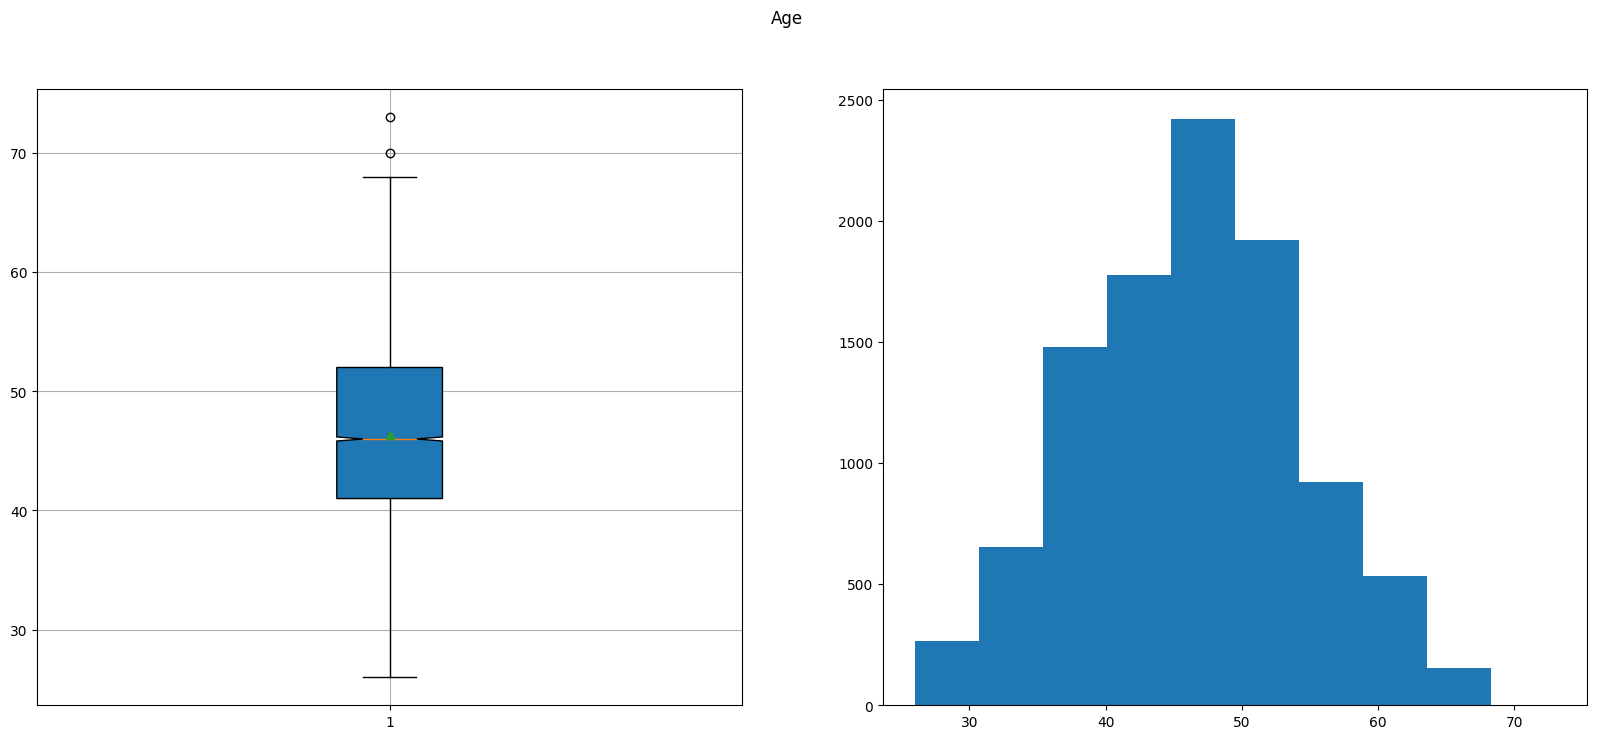

In [437]:
plt.figure(figsize=(20,8),dpi=100)
fig,axes=plt.subplots(1,2,figsize=(20,8),dpi=100)
axes[0].boxplot(x=data['Customer_Age'],showmeans=True,notch=True, patch_artist=True)
axes[1].hist(x=data['Customer_Age'])
axes[0].grid(True)
plt.suptitle("Age")
plt.show()

As can be seen, the age distribution of customers generally follows a normal distribution, so using it can further use age characteristics under the normal assumption.

Next,we can view the customer's gender distribution

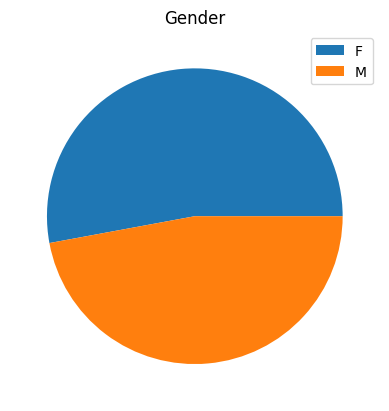

In [438]:
plt.pie(data['Gender'].value_counts().values.tolist())
plt.legend(data['Gender'].value_counts().index)
plt.title("Gender")
plt.show()

It can be seen that in our dataset, there are more samples of women than men, but the percentage difference is not so significant, so we can say that gender is evenly distributed.

Next, we can view the number of households per customer

<Figure size 2000x800 with 0 Axes>

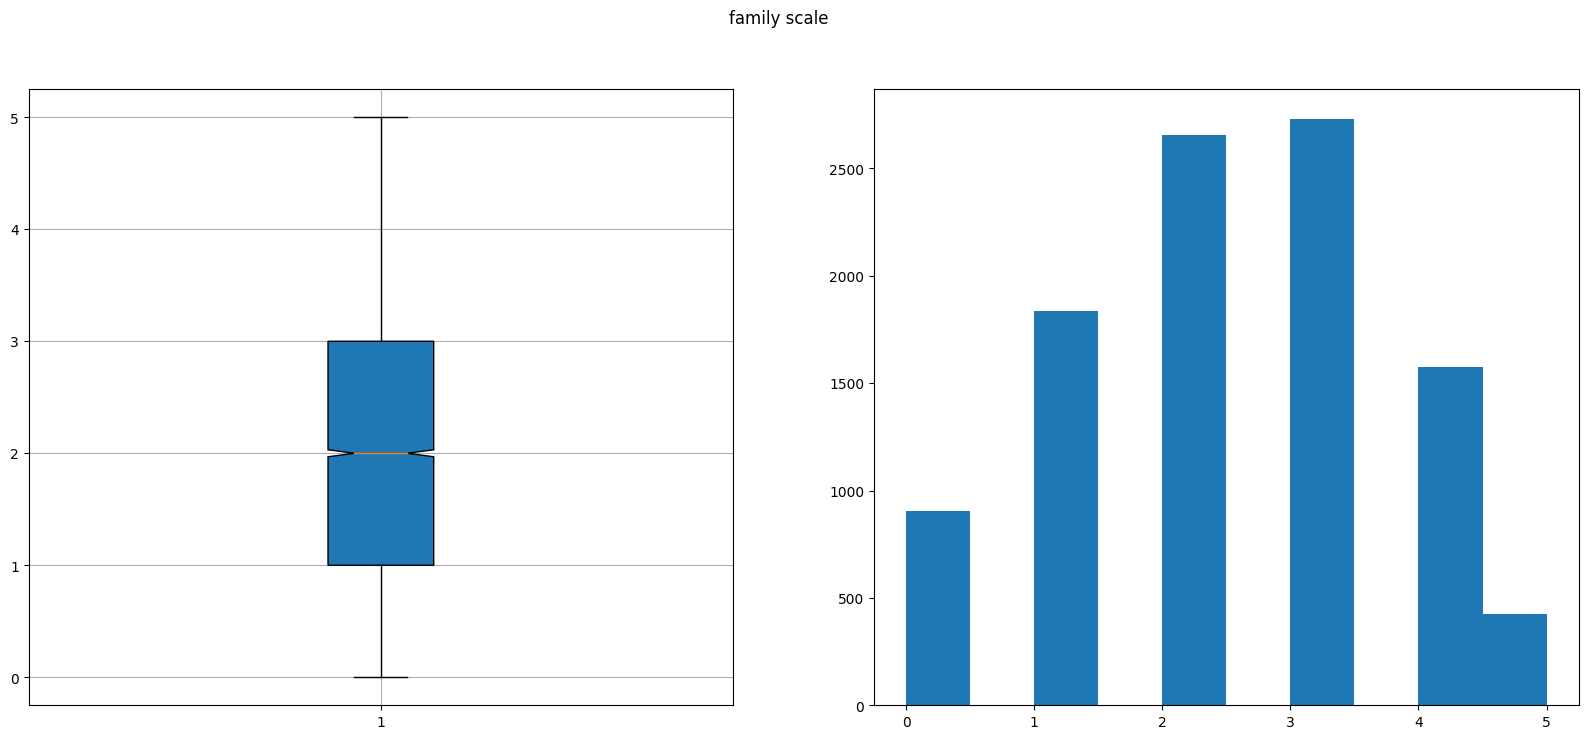

In [439]:
plt.figure(figsize=(20,8),dpi=100)
fig,axes=plt.subplots(1,2,figsize=(20,8),dpi=100)
axes[0].boxplot(x=data['Dependent_count'],notch=True, patch_artist=True)
axes[1].hist(x=data['Dependent_count'])
axes[0].grid(True)
plt.suptitle("family scale")
plt.show()

It also generally conforms to a normal distribution, slightly to the right, and may be useful for subsequent analysis.

Next, we can view the customer education level

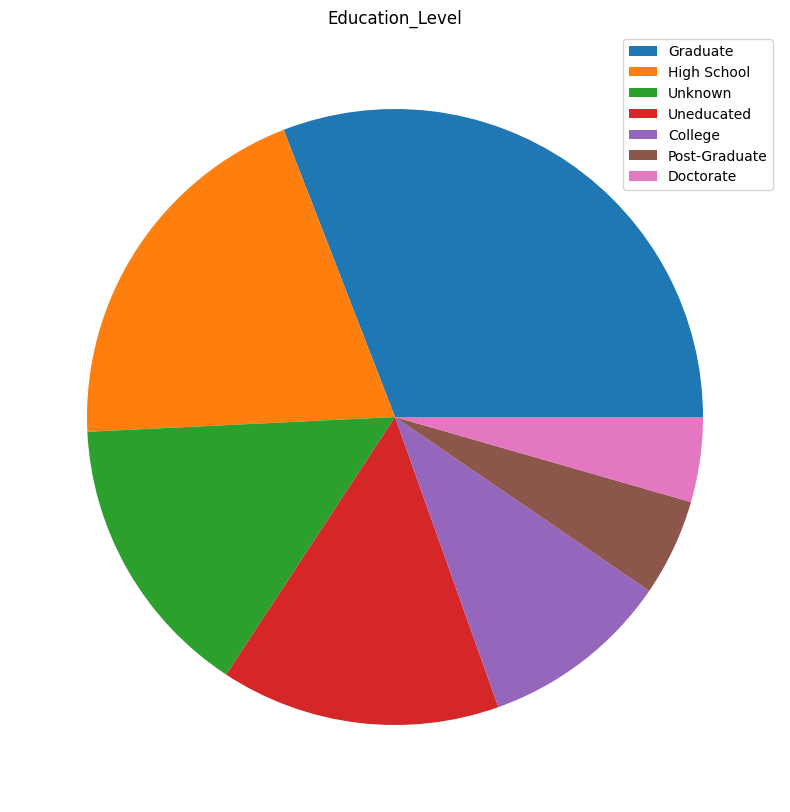

In [440]:
plt.figure(figsize=(20,10),dpi=100)
plt.pie(data['Education_Level'].value_counts().values.tolist())
plt.legend(data['Education_Level'].value_counts().index)
plt.title("Education_Level")
plt.show()

Assume that most unknown customers have not received any education. We can point out that more than 70% of customers have received formal education, of which about 35% have an education level above the master's level, and 45% have an education level above the undergraduate level.

Next, we can view the customer Marital status

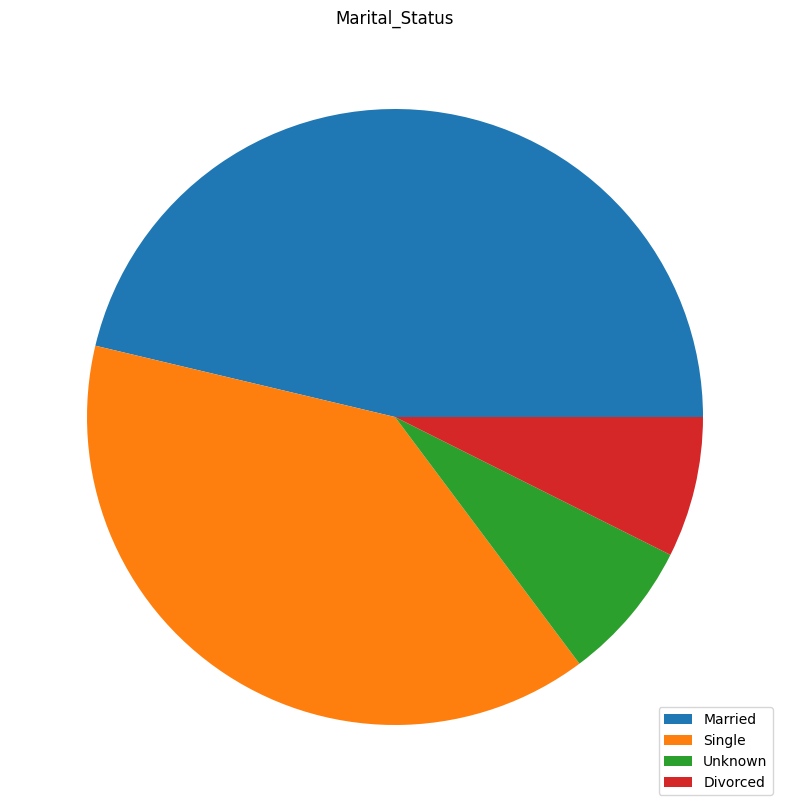

In [441]:
plt.figure(figsize=(20,10),dpi=100)
plt.pie(data['Marital_Status'].value_counts().values.tolist())
plt.legend(data['Marital_Status'].value_counts().index)
plt.title("Marital_Status")
plt.show()

It can be seen from the pie chart that almost half of the bank's customers are married, and only 7% of their customers have divorced

Next, we can view the customer income level

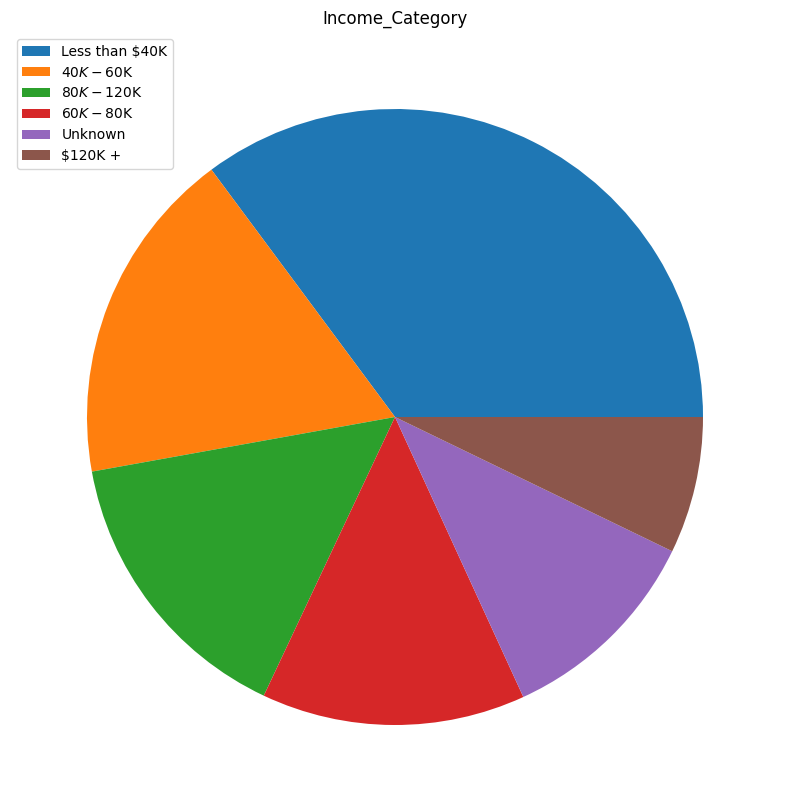

In [442]:
plt.figure(figsize=(20,10),dpi=100)
plt.pie(data['Income_Category'].value_counts().values.tolist())
plt.legend(data['Income_Category'].value_counts().index)
plt.title("Income_Category")
plt.show()

It can be seen that the annual income of most people is below $60K.

Next, we can view the customer card category

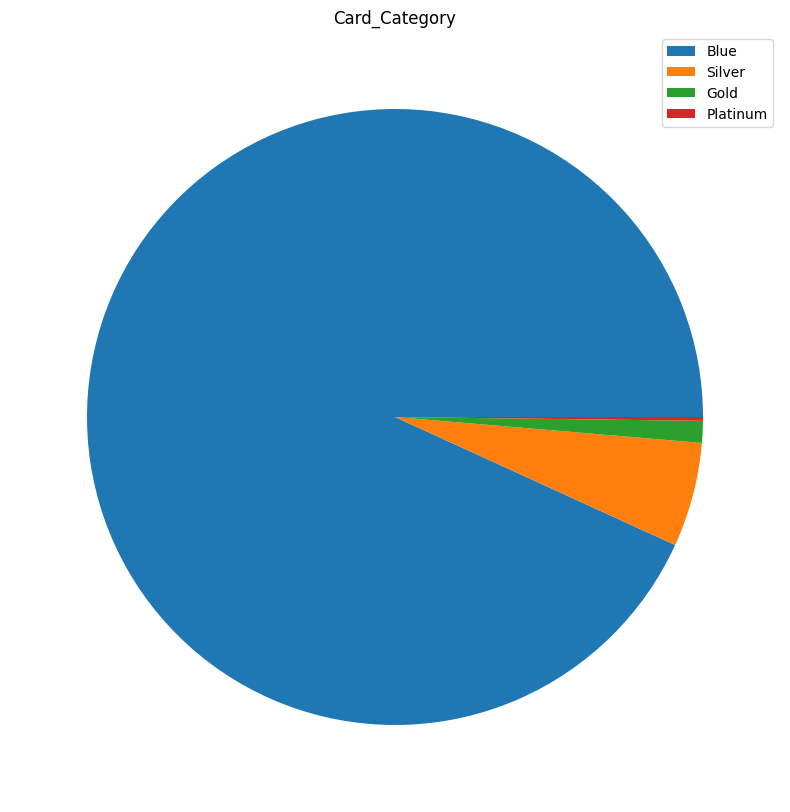

In [443]:
plt.figure(figsize=(20,10),dpi=100)
plt.pie(data['Card_Category'].value_counts().values.tolist())
plt.legend(data['Card_Category'].value_counts().index)
plt.title("Card_Category")
plt.show()

Blue cards account for the vast majority of the types of cards held.

Next, we can view the customer Monthly bill quantity

<Figure size 2000x800 with 0 Axes>

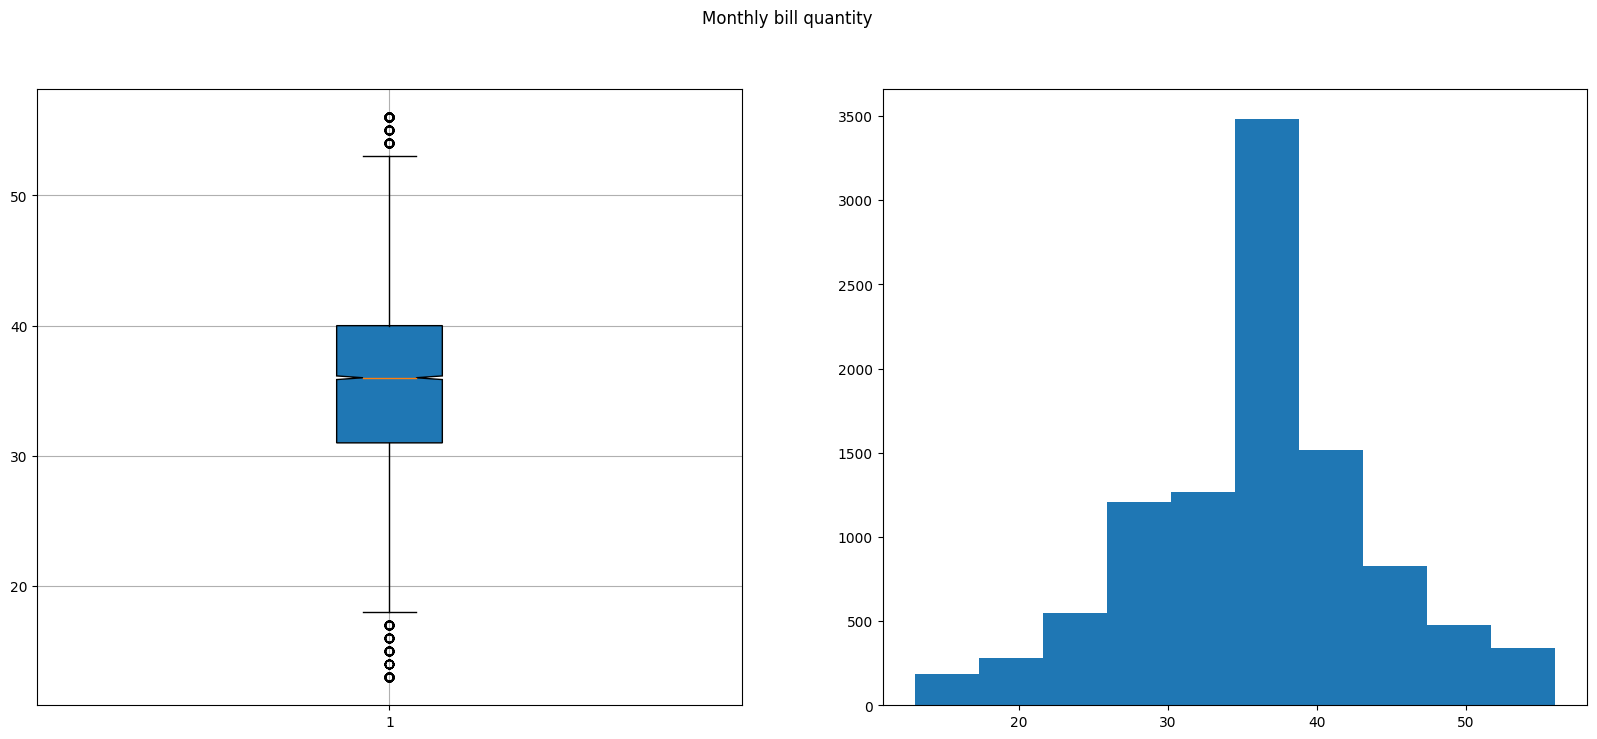

In [444]:
plt.figure(figsize=(20,8),dpi=100)
fig,axes=plt.subplots(1,2,figsize=(20,8),dpi=100)
axes[0].boxplot(x=data['Months_on_book'],notch=True, patch_artist=True)
axes[1].hist(x=data['Months_on_book'])
axes[0].grid(True)
plt.suptitle("Monthly bill quantity")
plt.show()

It can be seen that the peak value in the middle is particularly high, and obviously this indicator is not normally distributed.

Next, we can view the number of banking business held by each customer

<Figure size 2000x800 with 0 Axes>

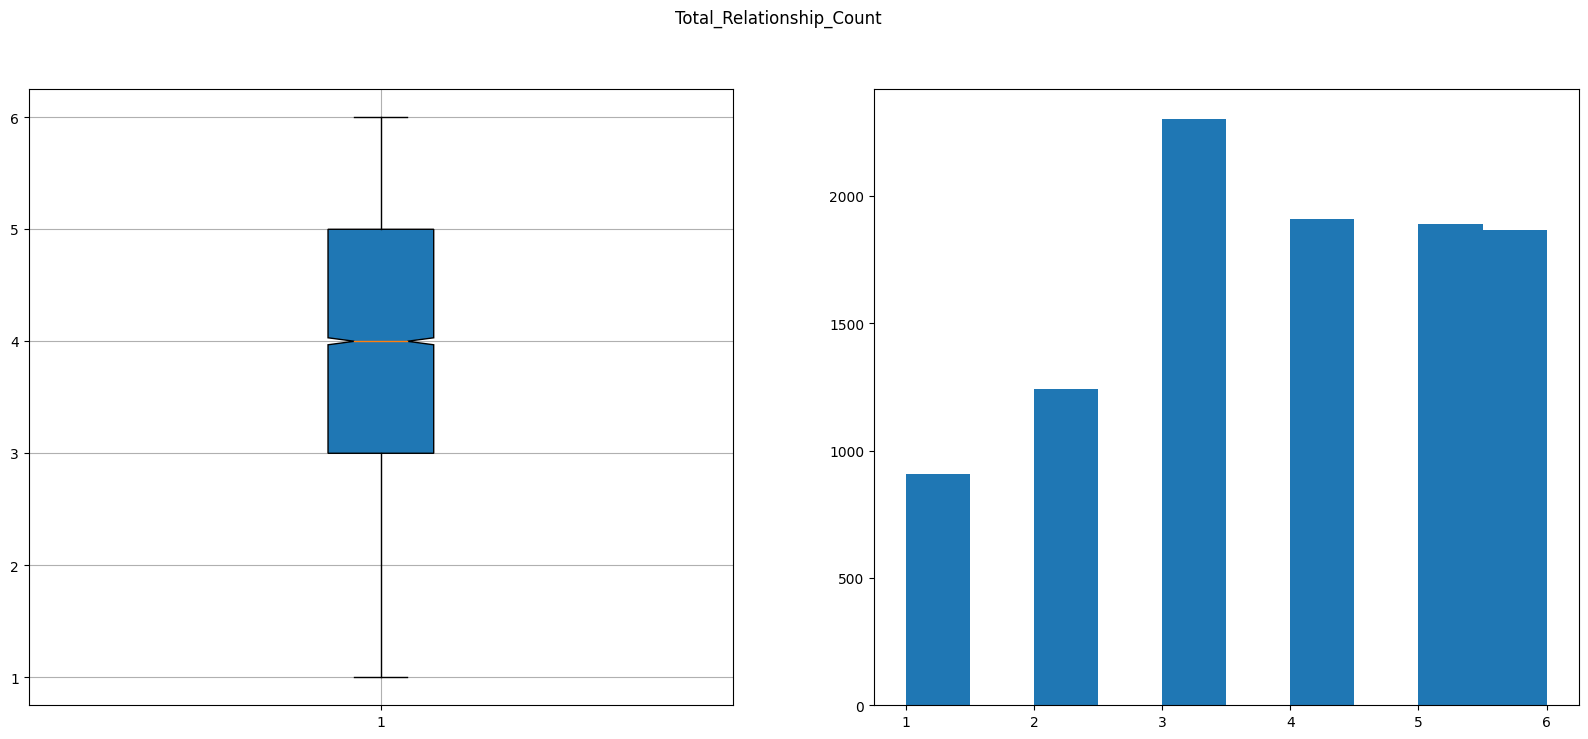

In [445]:
plt.figure(figsize=(20,8),dpi=100)
fig,axes=plt.subplots(1,2,figsize=(20,8),dpi=100)
axes[0].boxplot(x=data['Total_Relationship_Count'],notch=True, patch_artist=True)
axes[1].hist(x=data['Total_Relationship_Count'])
axes[0].grid(True)
plt.suptitle("Total_Relationship_Count")
plt.show()

Basically, they are uniformly distributed. Obviously, this indicator is not helpful for model training

Next, we can view the number of inactive months for users

<Figure size 2000x800 with 0 Axes>

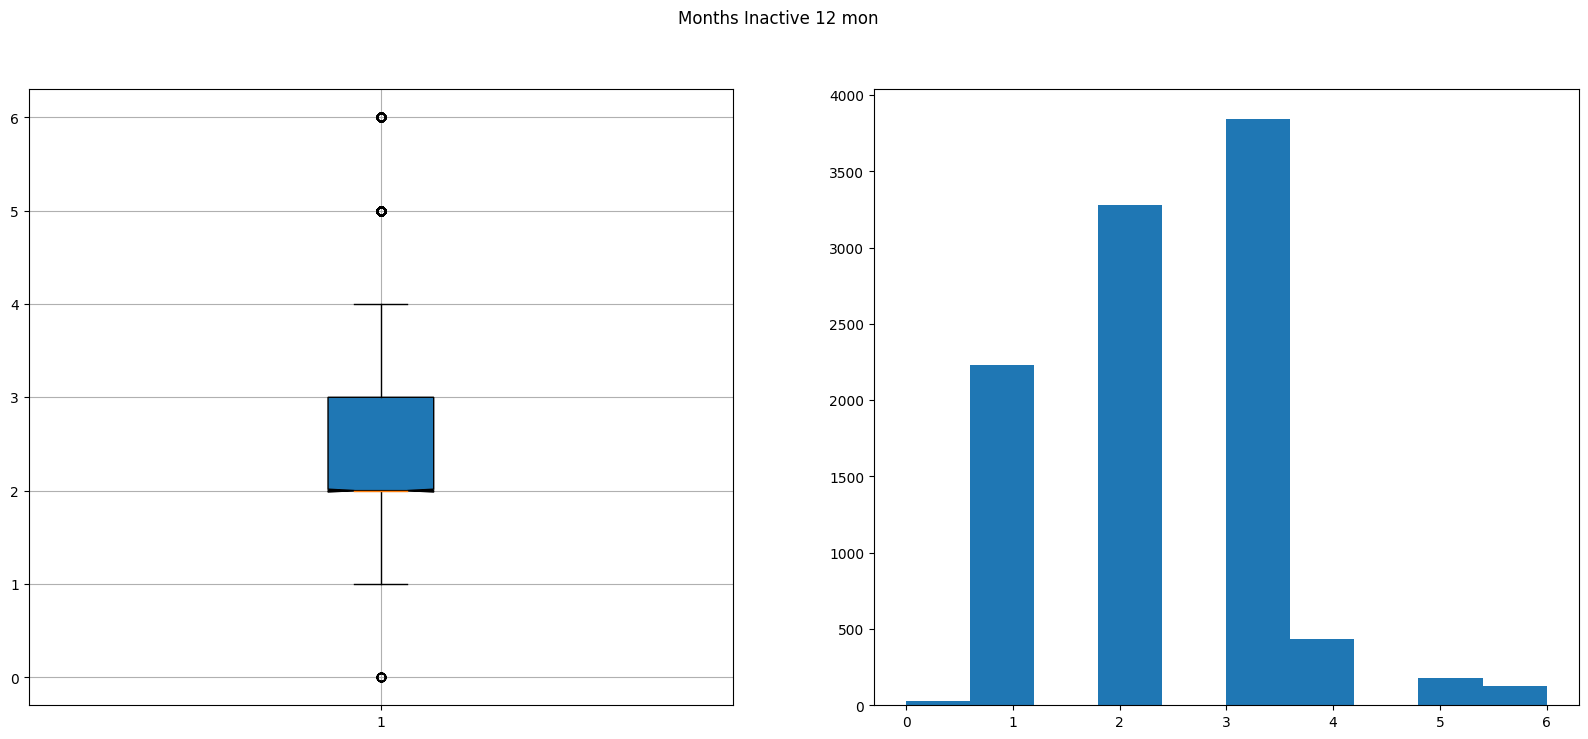

In [446]:
plt.figure(figsize=(20,8),dpi=100)
fig,axes=plt.subplots(1,2,figsize=(20,8),dpi=100)
axes[0].boxplot(x=data['Months_Inactive_12_mon'],notch=True, patch_artist=True)
axes[1].hist(x=data['Months_Inactive_12_mon'])
axes[0].grid(True)
plt.suptitle("Months Inactive 12 mon")
plt.show()

This seems to be useful. It seems that we can assume that the less active users are, the easier they are to lose them

Next, we can view the credit limit of every customer

<Figure size 2000x800 with 0 Axes>

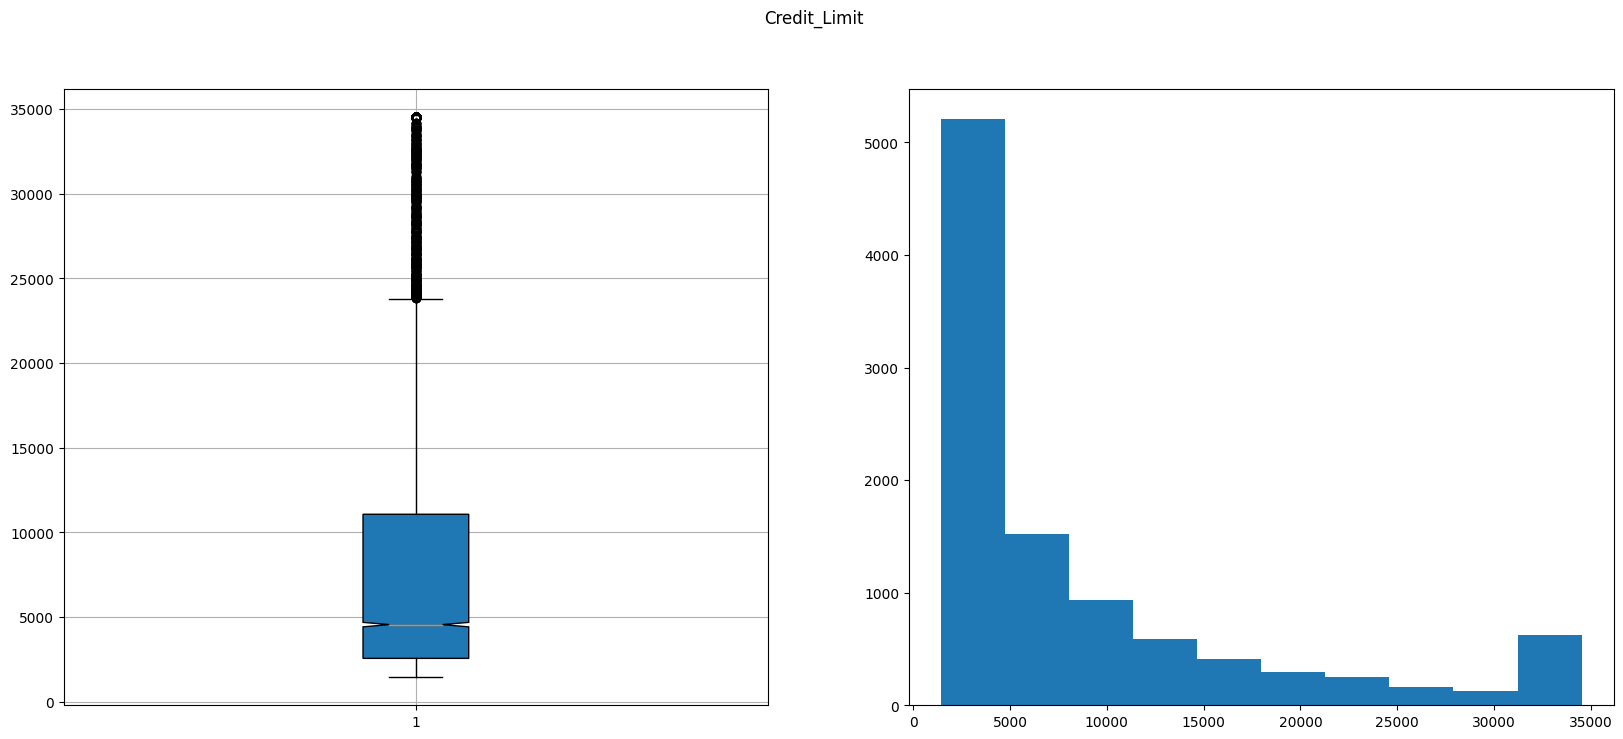

In [447]:
plt.figure(figsize=(20,8),dpi=100)
fig,axes=plt.subplots(1,2,figsize=(20,8),dpi=100)
axes[0].boxplot(x=data['Credit_Limit'],notch=True, patch_artist=True)
axes[1].hist(x=data['Credit_Limit'])
axes[0].grid(True)
plt.suptitle("Credit_Limit")
plt.show()

The quota for most people is between 0 and 10k, which is relatively normal. For the time being, it cannot be seen that it has anything to do with loss.

Next, we can view the distribution of total customer transactions

<Figure size 2000x800 with 0 Axes>

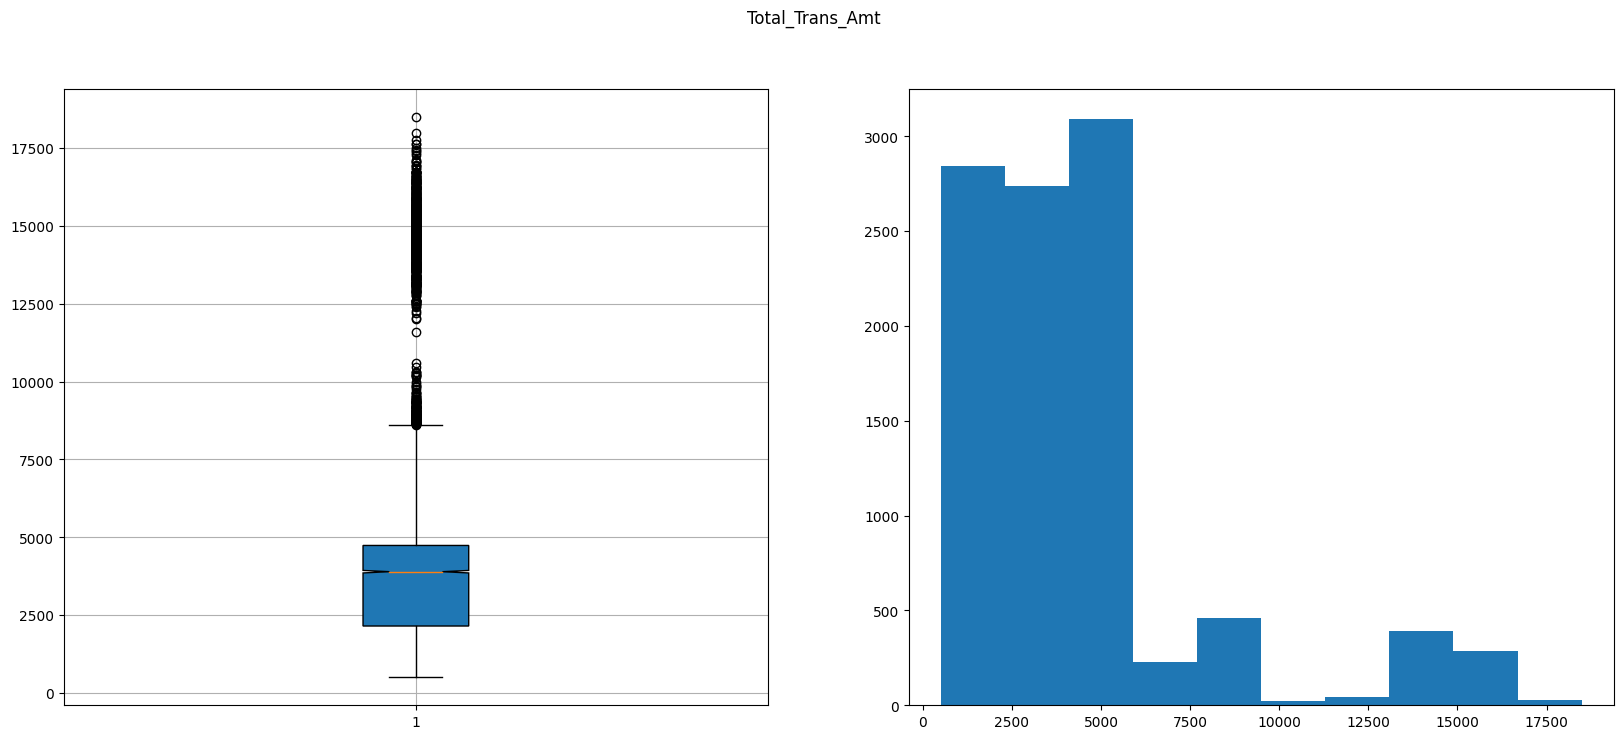

In [448]:
plt.figure(figsize=(20,8),dpi=100)
fig,axes=plt.subplots(1,2,figsize=(20,8),dpi=100)
axes[0].boxplot(x=data['Total_Trans_Amt'],notch=True, patch_artist=True)
axes[1].hist(x=data['Total_Trans_Amt'])
axes[0].grid(True)
plt.suptitle("Total_Trans_Amt")
plt.show()

The distribution of total transaction volume reflects a "multi group" distribution, with different types of customers presenting a cluster distribution, which may have some significance for our final churn analysis.

Next, we can view the target of the data prediction

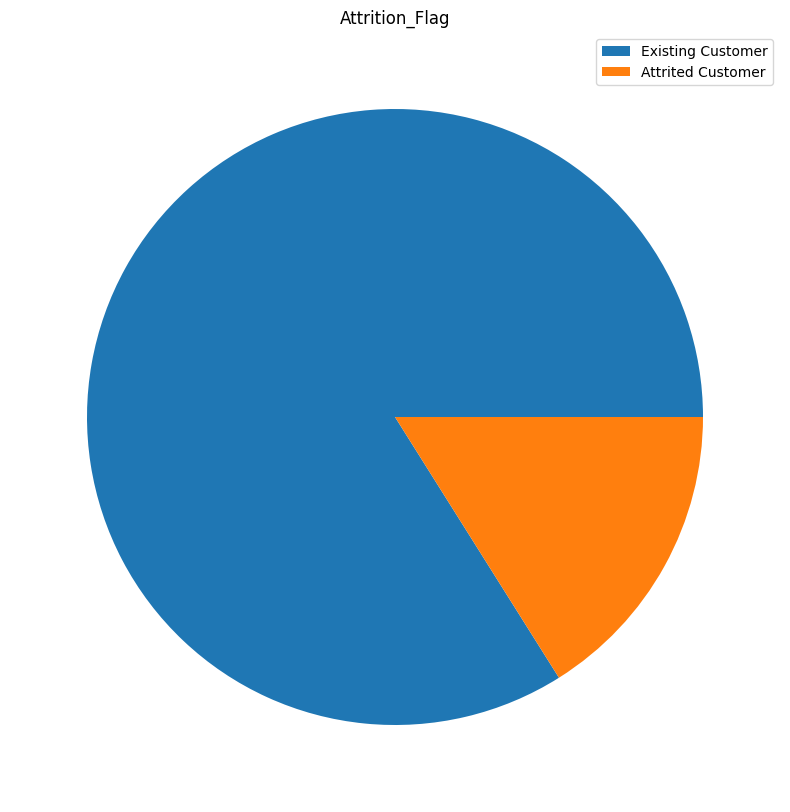

In [449]:
plt.figure(figsize=(20,10),dpi=100)
plt.pie(data['Attrition_Flag'].value_counts().values.tolist())
plt.legend(data['Attrition_Flag'].value_counts().index)
plt.title("Attrition_Flag")
plt.show()

We can see that only 16% of the data samples represent lost customers. In the next steps, I will use SMOTE to sample the lost samples to match the sample size of regular customers, in order to give the model selected later a better opportunity to capture small details.

before we user the SMOTE to process data, we need to change the data to be One Hot encoded based on different characteristics:

In [450]:
data.Attrition_Flag = data.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})
data.Gender = data.Gender.replace({'F':1,'M':0})
data = pd.concat([data,pd.get_dummies(data['Education_Level']).drop(columns=['Unknown'])],axis=1)
data = pd.concat([data,pd.get_dummies(data['Income_Category']).drop(columns=['Unknown'])],axis=1)
data = pd.concat([data,pd.get_dummies(data['Marital_Status']).drop(columns=['Unknown'])],axis=1)
data = pd.concat([data,pd.get_dummies(data['Card_Category']).drop(columns=['Platinum'])],axis=1)
data.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category','CLIENTNUM'],inplace=True)
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,0,45,0,3,39,5,1,3,12691.0,777,...,0,1,0,0,0,1,0,1,0,0
1,0,49,1,5,44,6,1,2,8256.0,864,...,0,0,0,1,0,0,1,1,0,0
2,0,51,0,3,36,4,1,0,3418.0,0,...,0,0,1,0,0,1,0,1,0,0
3,0,40,1,4,34,3,4,1,3313.0,2517,...,0,0,0,1,0,0,0,1,0,0
4,0,40,0,3,21,5,1,0,4716.0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,0,2,40,3,2,3,4003.0,1851,...,1,0,0,0,0,0,1,1,0,0
10123,1,41,0,2,25,4,2,3,4277.0,2186,...,1,0,0,0,1,0,0,1,0,0
10124,1,44,1,1,36,5,3,4,5409.0,0,...,0,0,0,1,0,1,0,1,0,0
10125,1,30,0,2,36,4,3,3,5281.0,0,...,1,0,0,0,0,0,0,1,0,0


Display thermal diagram:

<AxesSubplot: >

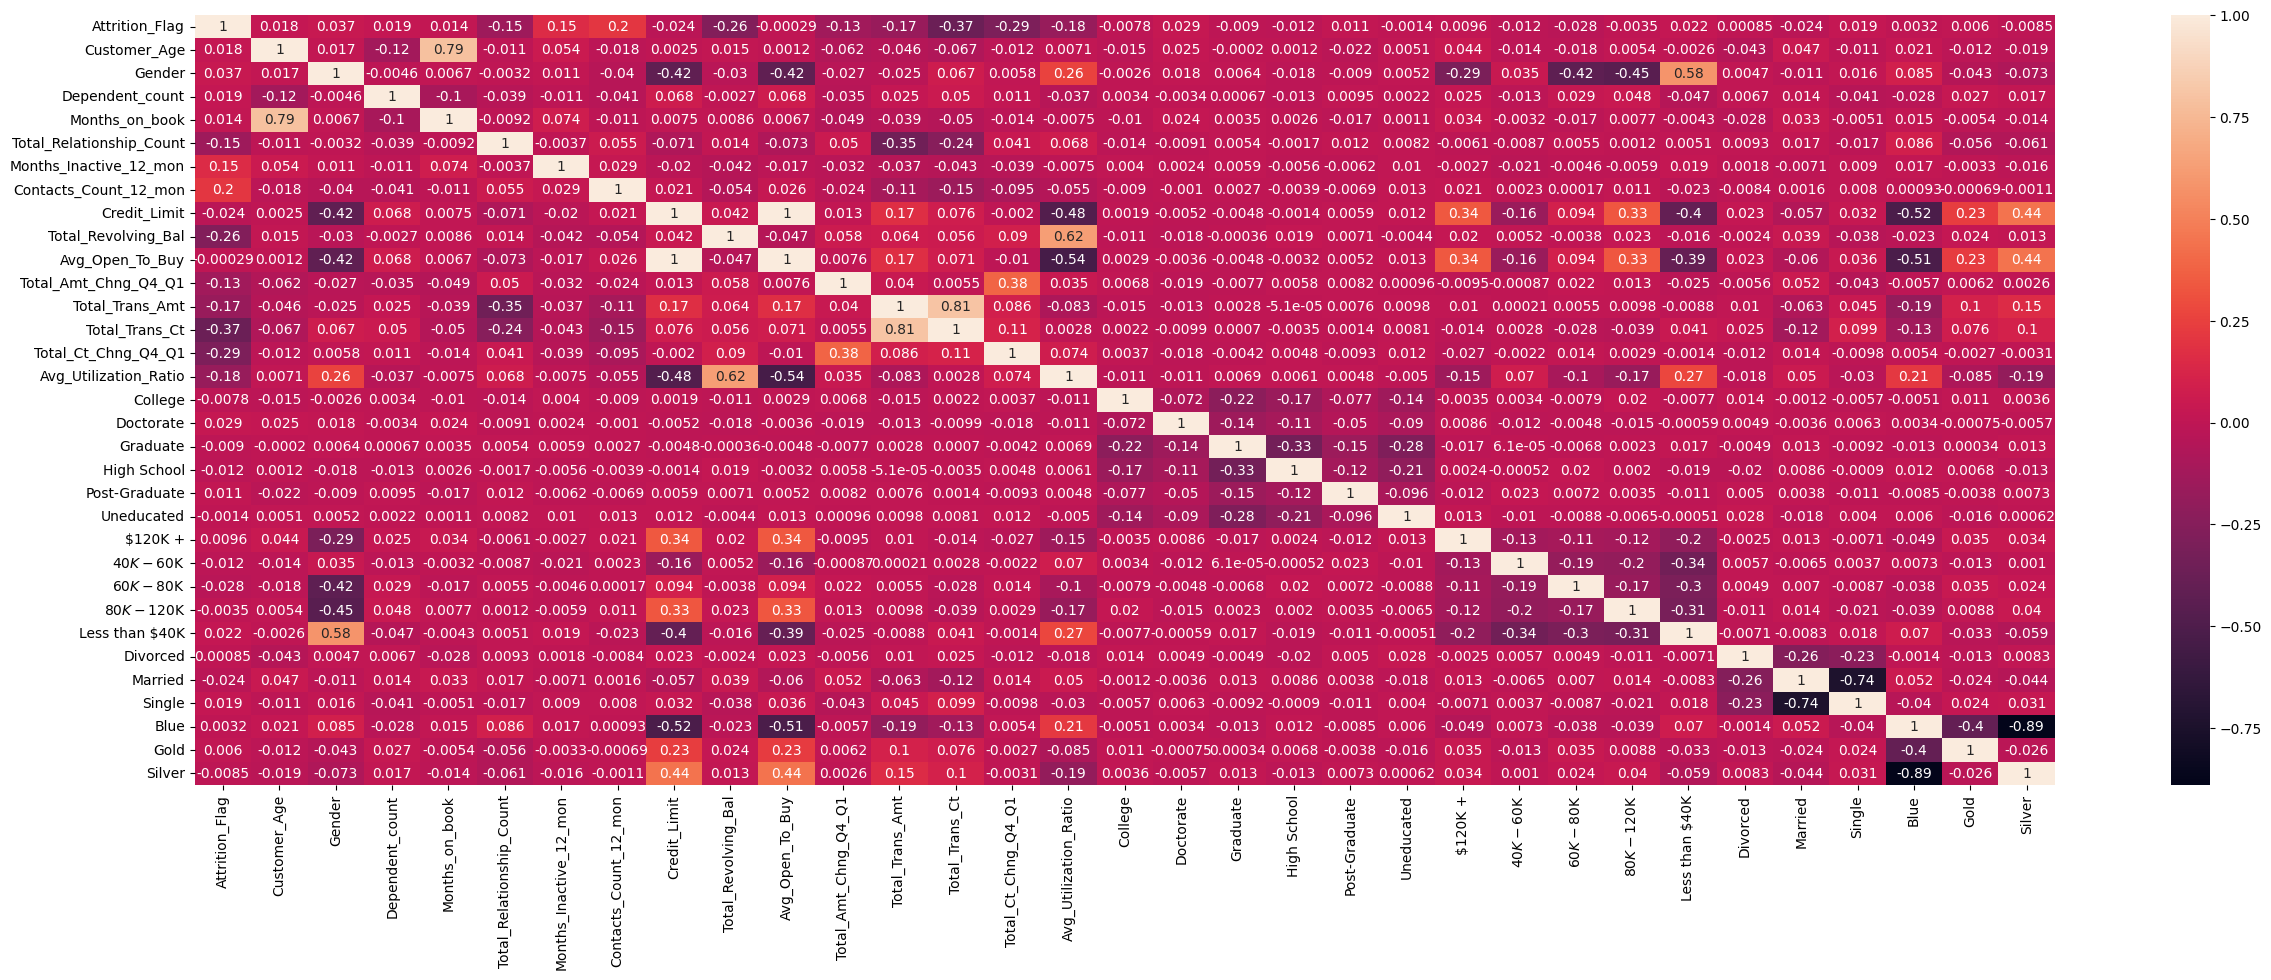

In [451]:
plt.figure(figsize=(30,10),dpi=100)
sns.heatmap(data.corr('pearson'),annot=True)

SMOTE model is often used to solve the problem of data imbalance. It is one of the popular methods to improve the performance of unbalanced data classification models by adding a small number of generated class samples to change the data distribution of the unbalanced dataset.

<AxesSubplot: >

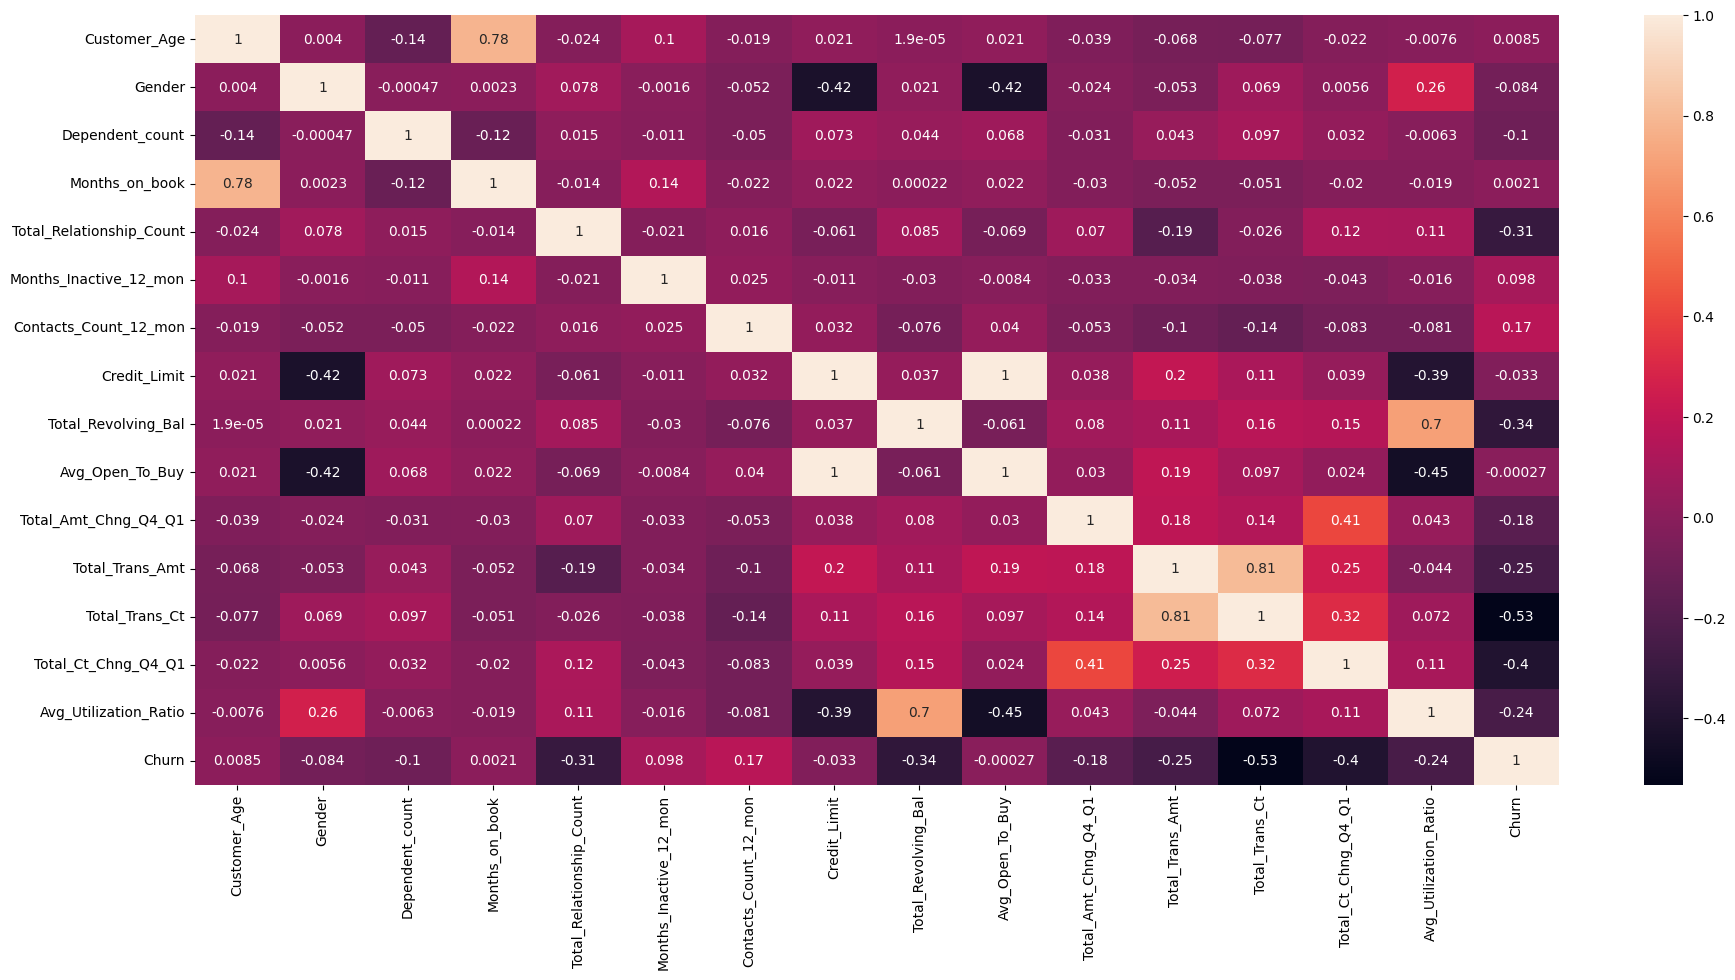

In [452]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(data[data.columns[1:]], data[data.columns[0]])
usampled_df = X.assign(Churn = y)
ohe_data =usampled_df[usampled_df.columns[15:-1]].copy()
usampled_df = usampled_df.drop(columns=usampled_df.columns[15:-1])
plt.figure(figsize=(22,10),dpi=100)
sns.heatmap(usampled_df.corr('pearson'),annot=True)

Conduct feature selection, reduce the weight of features that have little impact on the prediction results, and accelerate the training speed of the model.
We will use principal component analysis(PCA) to reduce the dimensions of single coded classification variables, thereby reducing variance. Using several principal components instead of dozens of single encoding features at the same time will help me build a better model.

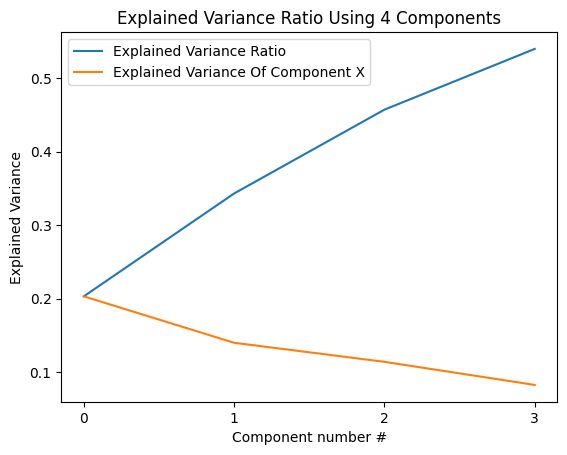

In [453]:
from sklearn.decomposition import PCA

N_COMPONENTS = 4

pca_model = PCA(n_components = N_COMPONENTS )

pc_matrix = pca_model.fit_transform(ohe_data)

evr = pca_model.explained_variance_ratio_
cumsum_evr = np.cumsum(evr)

ax = sns.lineplot(x=np.arange(0,len(cumsum_evr)),y=cumsum_evr,label='Explained Variance Ratio')
ax.set_title('Explained Variance Ratio Using {} Components'.format(N_COMPONENTS))
ax = sns.lineplot(x=np.arange(0,len(cumsum_evr)),y=evr,label='Explained Variance Of Component X')
ax.set_xticks([i for i in range(0,len(cumsum_evr))])
ax.set_xlabel('Component number #')
ax.set_ylabel('Explained Variance')
plt.show()

In [454]:
usampled_df_with_pcs = pd.concat([usampled_df,pd.DataFrame(pc_matrix,columns=['PC-{}'.format(i) for i in range(0,N_COMPONENTS)])],axis=1)
usampled_df_with_pcs

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn,PC-0,PC-1,PC-2,PC-3
0,45,0,3,39,5,1,3,12691.000000,777,11914.000000,1.335000,1144,42,1.625000,0.061000,0,-0.693548,-0.365332,-0.357809,0.725098
1,49,1,5,44,6,1,2,8256.000000,864,7392.000000,1.541000,1291,33,3.714000,0.105000,0,0.715968,0.889769,0.690384,0.140638
2,51,0,3,36,4,1,0,3418.000000,0,3418.000000,2.594000,1887,20,2.333000,0.000000,0,-0.729771,-0.196172,0.854411,0.144119
3,40,1,4,34,3,4,1,3313.000000,2517,796.000000,1.405000,1171,20,2.333000,0.760000,0,0.069265,0.620341,-0.631319,0.145946
4,40,0,3,21,5,1,0,4716.000000,0,4716.000000,2.175000,816,28,2.500000,0.000000,0,-0.679307,-0.339483,-0.198752,0.122828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,40,0,2,27,3,2,3,3231.283245,0,3231.283245,1.012000,2998,43,0.674555,0.000000,1,0.028466,-0.090904,0.716449,-0.440399
16996,40,0,3,30,3,2,3,6402.935465,0,6402.935465,0.625829,2307,43,0.431341,0.000000,1,0.018328,-0.216019,0.774202,-0.317139
16997,38,0,4,22,5,1,3,8632.355945,0,8632.355945,0.395319,2220,40,0.738365,0.000000,1,0.062130,-0.275597,-0.190914,-0.475260
16998,51,0,2,45,6,3,3,34516.000000,1202,33313.054859,0.536579,1815,38,0.401598,0.034956,1,0.059942,-0.334214,-0.180620,-0.451445


<AxesSubplot: >

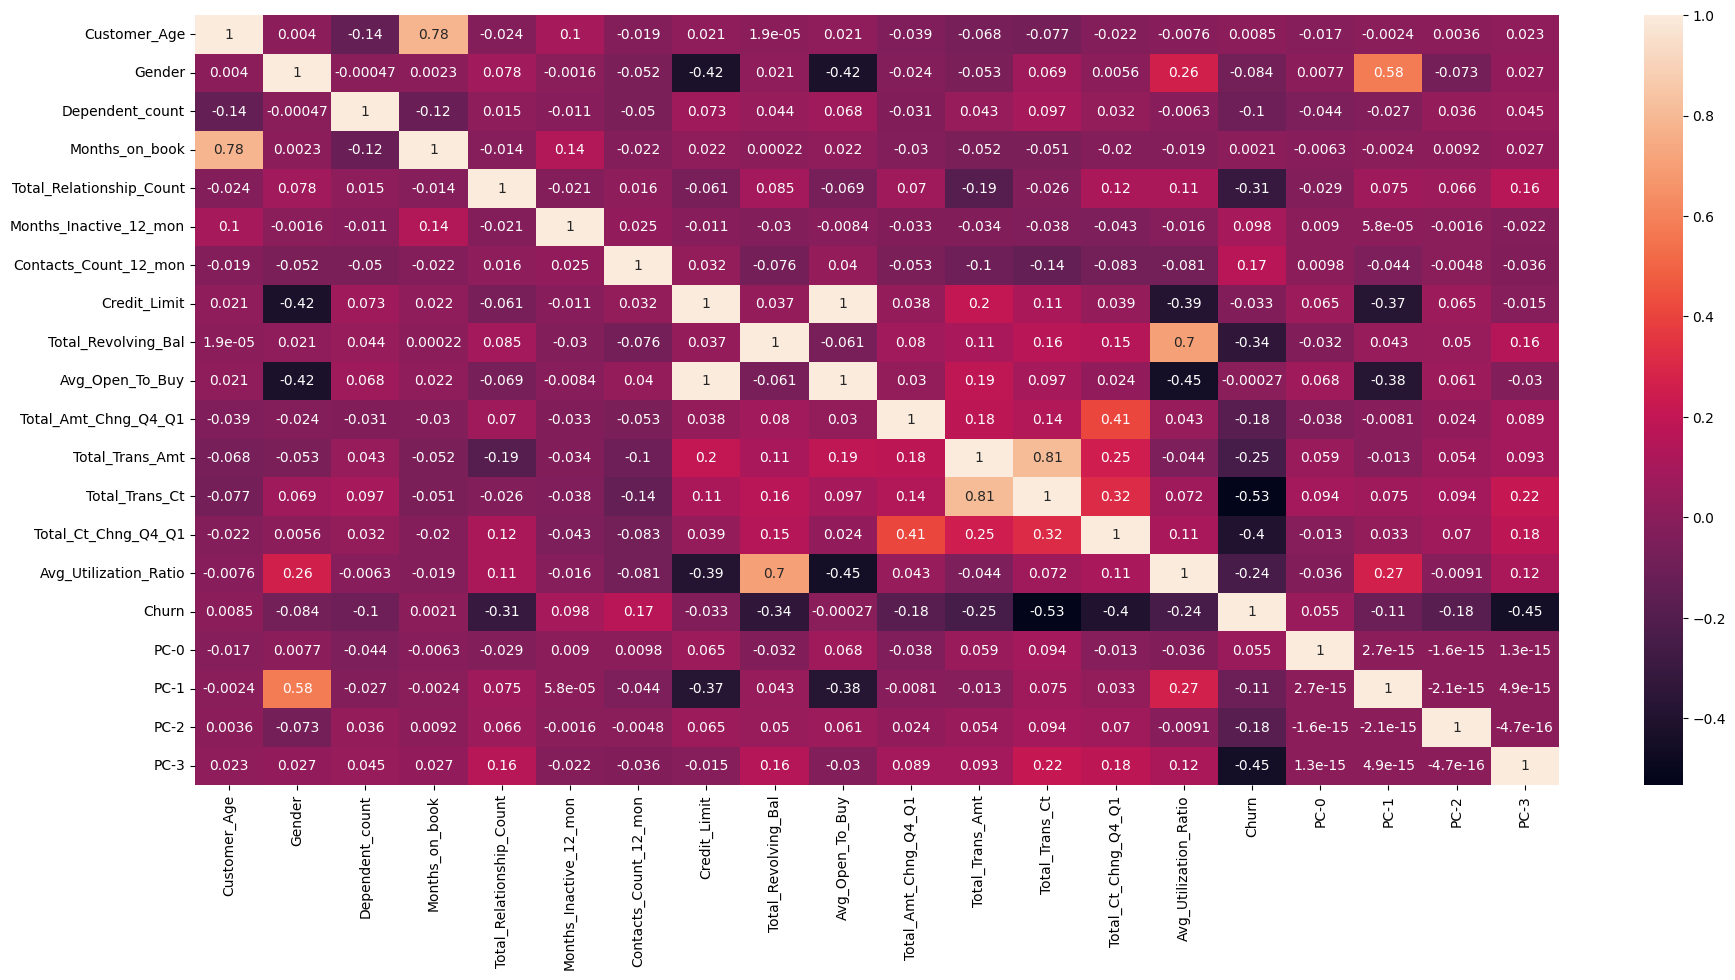

In [455]:
plt.figure(figsize=(22,10),dpi=100)
sns.heatmap(usampled_df_with_pcs.corr('pearson'),annot=True)

Select the following features to divide the training set and conduct training:

In [456]:
from sklearn.model_selection import train_test_split

X_features = ['Total_Trans_Ct','PC-3','PC-1','PC-0','PC-2','Total_Ct_Chng_Q4_Q1','Total_Relationship_Count']

X = usampled_df_with_pcs[X_features]
y = usampled_df_with_pcs['Churn']

train_x,test_x,train_y,test_y = train_test_split(X,y,random_state=42)

Use random forest, AdaBoost, and SVM models for training and we get the F1-score to evaluate the performances of models.

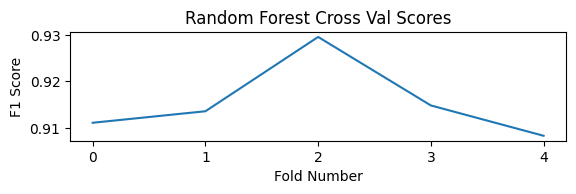

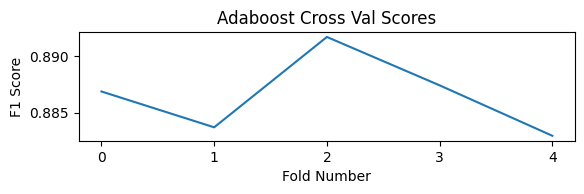

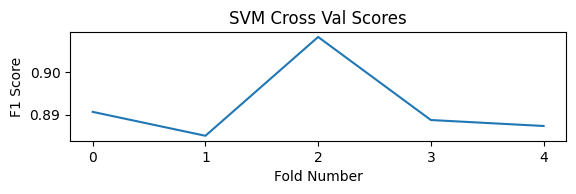

In [457]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

rf_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",RandomForestClassifier(random_state=42)) ])
ada_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",AdaBoostClassifier(random_state=42,learning_rate=0.7)) ])
svm_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",SVC(random_state=42,kernel='rbf')) ])


f1_cross_val_scores = cross_val_score(rf_pipe,train_x,train_y,cv=5,scoring='f1')
ada_f1_cross_val_scores=cross_val_score(ada_pipe,train_x,train_y,cv=5,scoring='f1')
svm_f1_cross_val_scores=cross_val_score(svm_pipe,train_x,train_y,cv=5,scoring='f1')
plt.subplot(3,1,1)
ax = sns.lineplot(x=range(0,len(f1_cross_val_scores)),y=f1_cross_val_scores)
ax.set_title('Random Forest Cross Val Scores')
ax.set_xticks([i for i in range(0,len(f1_cross_val_scores))])
ax.set_xlabel('Fold Number')
ax.set_ylabel('F1 Score')
plt.show()
plt.subplot(3,1,2)
ax = sns.lineplot(x=range(0,len(ada_f1_cross_val_scores)),y=ada_f1_cross_val_scores)
ax.set_title('Adaboost Cross Val Scores')
ax.set_xticks([i for i in range(0,len(ada_f1_cross_val_scores))])
ax.set_xlabel('Fold Number')
ax.set_ylabel('F1 Score')
plt.show()
plt.subplot(3,1,3)
ax = sns.lineplot(x=range(0,len(svm_f1_cross_val_scores)),y=svm_f1_cross_val_scores)
ax.set_title('SVM Cross Val Scores')
ax.set_xticks([i for i in range(0,len(svm_f1_cross_val_scores))])
ax.set_xlabel('Fold Number')
ax.set_ylabel('F1 Score')
plt.show()

The Random Forest F1 score was the highest, reaching 0.93.

Predict the test set and see the effects of the three models:

In [458]:
rf_pipe.fit(train_x,train_y)
rf_prediction = rf_pipe.predict(test_x)

ada_pipe.fit(train_x,train_y)
ada_prediction = ada_pipe.predict(test_x)

svm_pipe.fit(train_x,train_y)
svm_prediction = svm_pipe.predict(test_x)

In [459]:
from sklearn.metrics import f1_score as f1

print('F1 Score of Random Forest Model On Test Set - {}'.format(f1(rf_prediction,test_y)))
print('F1 Score of AdaBoost Model On Test Set - {}'.format(f1(ada_prediction,test_y)))
print('F1 Score of SVM Model On Test Set - {}'.format(f1(svm_prediction,test_y)))

F1 Score of Random Forest Model On Test Set - 0.9071274298056156
F1 Score of AdaBoost Model On Test Set - 0.8847530422333572
F1 Score of SVM Model On Test Set - 0.8866876057018604


Next, model prediction is performed on the original data:

In [460]:
ohe_data =data[data.columns[16:]].copy()
pc_matrix = pca_model.fit_transform(ohe_data)
original_df_with_pcs = pd.concat([data,pd.DataFrame(pc_matrix,columns=['PC-{}'.format(i) for i in range(0,N_COMPONENTS)])],axis=1)

unsampled_data_prediction_RF = rf_pipe.predict(original_df_with_pcs[X_features])
unsampled_data_prediction_ADA = ada_pipe.predict(original_df_with_pcs[X_features])
unsampled_data_prediction_SVM = svm_pipe.predict(original_df_with_pcs[X_features])

Finally, use the running results of the random forest model on the original data

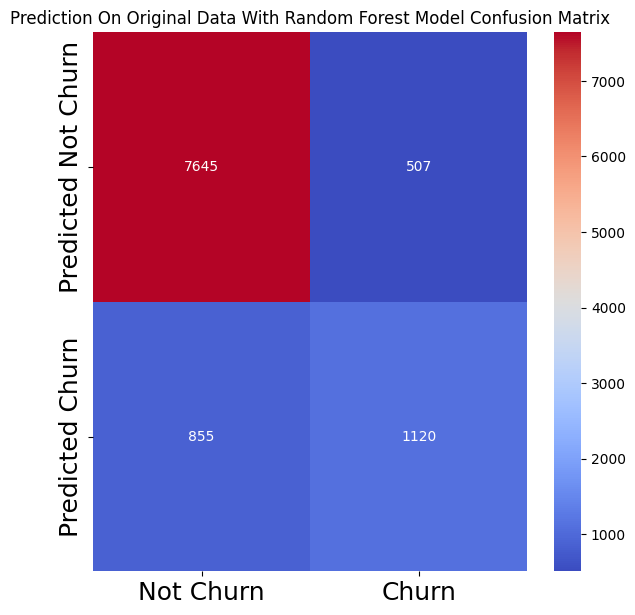

In [461]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(7,7),dpi=100)
ax = sns.heatmap(confusion_matrix(unsampled_data_prediction_RF,original_df_with_pcs['Attrition_Flag']),annot=True,cmap='coolwarm',fmt='d')
ax.set_title('Prediction On Original Data With Random Forest Model Confusion Matrix')
ax.set_xticklabels(['Not Churn','Churn'],fontsize=18)
ax.set_yticklabels(['Predicted Not Churn','Predicted Churn'],fontsize=18)

plt.show()

It can be seen that the number of customers who did not lose hit 7645 and missed 855.
Lost customers hit 1120 people and missed 507.
Overall, it is a relatively excellent model.